In [70]:
import numpy as np
import pandas as pd


In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-07 18:30:54--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M   983KB/s    in 1.5s    

2023-10-07 18:30:57 (983 KB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [71]:
df = pd.read_csv('data.csv.2')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [72]:
df.columns= df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [73]:
categorical = df.dtypes[df.dtypes == object].index
numerical =df.dtypes[df.dtypes != object].index
categorical

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [74]:
for c in categorical:
    df[c]=df[c].str.lower().str.replace(' ','_')

df.head()    

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [75]:
columns_needed =[
    'make',
    'model',
    'year',
    'engine_hp',
    'engine_cylinders',
'transmission_type',
    'vehicle_style',
    'highway_mpg',
    'city_mpg',
    'msrp']

focused_df = df[columns_needed]
focused_df.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [76]:
focused_df = focused_df.fillna(0)
focused_df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
df_full_train,df_test = train_test_split(focused_df,test_size=0.2,random_state=1)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

print(len(df_train),len(df_val),len(df_test))

7148 2383 2383


In [78]:
from sklearn.metrics import roc_auc_score
import numpy as np

numerical_features = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]

auc_scores = []
df_train['above_average'] = (df_train['msrp'] > df_train['msrp'].mean()).astype(int)
for feature in numerical_features:
    # Calculate ROC AUC score
    auc = roc_auc_score(df_train['above_average'], df_train[feature])
    
    # Invert the variable if AUC < 0.5
    if auc < 0.5:
        auc = roc_auc_score(df_train['above_average'], -df_train[feature])
    
    auc_scores.append((feature, auc))

# Find the feature with the highest AUC
best_numerical_feature = max(auc_scores, key=lambda x: x[1])

print("The numerical variable with the highest AUC is:", best_numerical_feature[0])


The numerical variable with the highest AUC is: engine_hp


In [80]:
df_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp',
       'above_average'],
      dtype='object')

In [99]:
df_train['above_average'] = (df_train['msrp'] > df_train['msrp'].mean()).astype(int)

df_val['above_average'] = (df_val['msrp'] > df_val['msrp'].mean()).astype(int)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

y_train = df_train['above_average']
y_val = df_val['above_average']
del df_train['msrp']
del df_train['above_average']
del df_val['msrp']
del df_val['above_average']
dv = DictVectorizer(sparse=False)
dicts_train = df_train.to_dict(orient='records')
dicts_val = df_val.to_dict(orient='records')
encoded_df_train = dv.fit_transform(dicts_train)
encoded_df_val = dv.transform(dicts_val)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(encoded_df_train,y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [83]:
probs = model.predict_proba(encoded_df_val)[:, 1]

In [84]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC on the validation data
auc = roc_auc_score(y_val, probs)

# Round the AUC to 3 digits
rounded_auc = round(auc, 3)

print("The AUC of the model on the validation dataset is:", rounded_auc)

The AUC of the model on the validation dataset is: 0.972


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0, 1.01, 0.01)
precisions = []
recalls = []

for threshold in thresholds:
    y_pred_thresholded = (probs >= threshold).astype(int)
    
    precision = precision_score(y_val, y_pred_thresholded)
    recall = recall_score(y_val, y_pred_thresholded)
    
    precisions.append(precision)
    recalls.append(recall)


/home/peng/ML_Zoom_Camp/ML_Venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


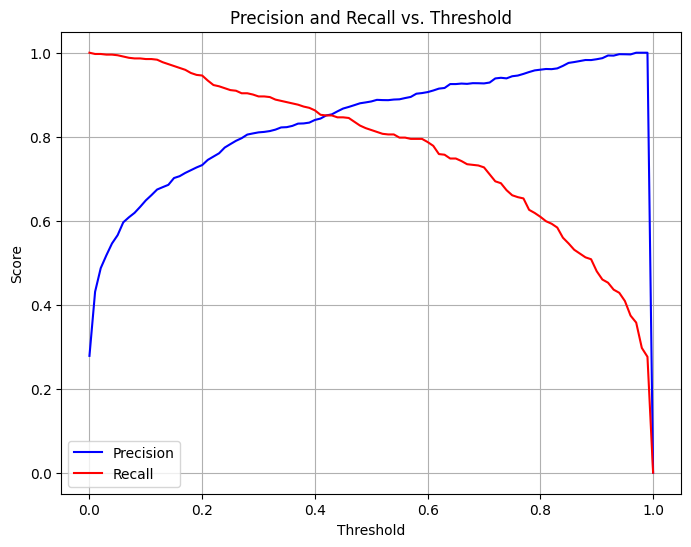

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.title('Precision and Recall vs. Threshold')
plt.show()


In [89]:
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_thresholded = (probs >= threshold).astype(int)
    
    precision = precision_score(y_val, y_pred_thresholded)
    recall = recall_score(y_val, y_pred_thresholded)
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f1_scores.append(f1)


/home/peng/ML_Zoom_Camp/ML_Venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
max_f1_score = max(f1_scores)
max_f1_threshold = thresholds[f1_scores.index(max_f1_score)]

print("The threshold at which F1 is maximal is:", max_f1_threshold)


The threshold at which F1 is maximal is: 0.46


In [97]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# Define the KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize an empty list to store the AUC scores
auc_scores = []

for train_idx, val_idx in kf.split(df_train):
    # Split the data into train and validation sets for each fold
    train_fold, val_fold = df_train.iloc[train_idx], df_train.iloc[val_idx]
    
    # Prepare the data for training
    X_train_fold = dv.transform(train_fold.to_dict(orient="records"))
    y_train_fold = train_fold['above_average']
    del train_fold['above_average']
    del train_fold['msrp']
    
    X_val_fold = dv.transform(val_fold.to_dict(orient="records"))
    y_val_fold = val_fold['above_average']
    del val_fold['above_average']
    del val_fold['msrp']
    
    # Initialize and train the logistic regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)
    
    probs_fold = model.predict_proba(X_val_fold)[:, 1]
    
    auc_fold = roc_auc_score(y_val_fold, probs_fold)
    
    auc_scores.append(auc_fold)

std_deviation = np.std(auc_scores)

print("The standard deviation of the AUC scores across different folds is:", round(std_deviation, 3))


The standard deviation of the AUC scores across different folds is: 0.006


In [100]:
C_values = [0.01, 0.1, 0.5, 10]

mean_scores = []
std_deviations = []

for C in C_values:
    auc_scores = []

    for train_idx, val_idx in kf.split(df_train):
        train_fold, val_fold = df_train.iloc[train_idx], df_train.iloc[val_idx]

        X_train_fold = dv.transform(train_fold.to_dict(orient="records"))
        y_train_fold = train_fold['above_average']

        X_val_fold = dv.transform(val_fold.to_dict(orient="records"))
        y_val_fold = val_fold['above_average']

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_fold, y_train_fold)

        probs_fold = model.predict_proba(X_val_fold)[:, 1]

        auc_fold = roc_auc_score(y_val_fold, probs_fold)

        auc_scores.append(auc_fold)

    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)

    mean_scores.append(mean_auc)
    std_deviations.append(std_auc)

best_mean_score_index = np.argmax(mean_scores)

best_C = C_values[best_mean_score_index]

best_mean_score = mean_scores[best_mean_score_index]
best_std_deviation = std_deviations[best_mean_score_index]

print("The C value that leads to the best mean score is:", best_C)
print("The mean score for the best C value is:", round(best_mean_score, 3))
print("The standard deviation for the best C value is:", round(best_std_deviation, 3))


The C value that leads to the best mean score is: 10
The mean score for the best C value is: 0.977
The standard deviation for the best C value is: 0.004
